In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os

In [2]:
# fix seeds
np.random.seed(13)

In [3]:
def get_names():
    li = []
    picture = 'chest_xray/'
    for folder in ['train/','test/','val/']:
        normal = 0
        pneu = 0
        for kind in ['NORMAL/','PNEUMONIA/']:
            directory = picture+folder+kind
            for filename in os.listdir(directory):
                f = os.path.join(directory, filename)
                if os.path.isfile(f):
                    if kind == 'NORMAL/':
                        normal += 1
                    else:
                        pneu += 1    
                
        li.append((folder[:-1],normal,pneu))           

    df = pd.DataFrame(li, columns=['folder','NORMAL','PNEUMONIA'])
    return df

data = get_names()
data

,folder,NORMAL,PNEUMONIA
0,train,1341,3875
1,test,234,390
2,val,8,8


<AxesSubplot:title={'center':'Distribution of Labels'}, xlabel='Folder'>

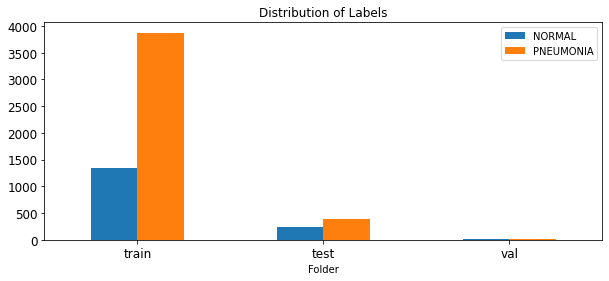

In [4]:
data.plot.bar(x='folder',rot=0,figsize=(10,4),title='Distribution of Labels',xlabel='Folder',fontsize='large')

In [5]:
norm = sum(data["NORMAL"])
sick = sum(data["PNEUMONIA"])

print(f'Healthy patients: {norm} (in total)')
print(f'Sick patients: {sick} (in total)')

Healthy patients: 1583 (in total)
Sick patients: 4273 (in total)


In [6]:
norm == 1109+237+237

True

In [7]:
sick == 2991+641+641

True

In [8]:
def check_count():
    picture = 'chest_xray/'
    for kind in ['NORMAL/','PNEUMONIA/']:
        li = []
        for folder in ['train/','val/','test/']:
            directory = picture+folder+kind
            for filename in os.listdir(directory):
                f = os.path.join(directory, filename)
                if os.path.isfile(f):   
                    li.append(str(f))           

        df = pd.DataFrame(li, columns=['path'])
        df.to_csv('chest_xray_re/'+kind[:-1]+'.csv',index=False)
    return

check_count()

In [9]:
def get_csv(dataset):
    path = f'chest_xray_re/{dataset}.csv'
    data = pd.read_csv(path)
    return data

normal = get_csv(dataset="NORMAL")
PNEU   = get_csv(dataset="PNEUMONIA")
assert normal.shape[0] == norm
assert PNEU.shape[0] == sick

In [10]:
norm_train, norm_val_test = train_test_split(normal, test_size=237+237, train_size=1109, random_state=13)
norm_val, norm_test = train_test_split(norm_val_test, test_size=237, train_size=237, random_state=13)

norm_train['label'] = 0
norm_val['label'] = 0
norm_test['label'] = 0

pneu_train, pneu_val_test = train_test_split(PNEU, test_size=641+641, train_size=2991, random_state=13)
pneu_val, pneu_test = train_test_split(pneu_val_test, test_size=641, train_size=641, random_state=13)

pneu_train['label'] = 1
pneu_val['label'] = 1
pneu_test['label'] = 1

print(f'Train: {norm_train.shape} | {pneu_train.shape}')
print(f'Val:   {norm_val.shape} | {pneu_val.shape}')
print(f'Test: {norm_test.shape} | {pneu_test.shape}')

Train: (1109, 2) | (2991, 2)
Val:   (237, 2) | (641, 2)
Test: (237, 2) | (641, 2)


In [11]:
train = pd.concat([norm_train, pneu_train], ignore_index=True, sort=False)
val = pd.concat([norm_val, pneu_val], ignore_index=True, sort=False)
test = pd.concat([norm_test, pneu_test], ignore_index=True, sort=False)

print(f'Train: {train.shape}')
print(f'Val: {val.shape}')
print(f'Test: {test.shape}')

Train: (4100, 2)
Val: (878, 2)
Test: (878, 2)


In [12]:
import shutil

# norm_train, norm_val, norm_test
# pneu_train, pneu_val, pneu_test

def move_files(to, kind, folder):
    picture = 'chest_xray_re/' + kind
    path = 'chest_xray_re/' + to

    for index, row in folder.iterrows():
        from_path = row['path']
        to_path = path+row['path'][len(picture):]
        shutil.move(from_path, to_path)
                         
    return

#kind = ['NORMAL/','PNEUMONIA/']                 
#folder = ['train/','test/','val/']
#move_files('test/','PNEUMONIA/', pneu_test)

In [13]:
# train.to_csv('chest_xray_re/train.csv',index=False)
# val.to_csv('chest_xray_re/val.csv',index=False)
# test.to_csv('chest_xray_re/test.csv',index=False)

In [14]:
def get_reshuffle():
    li = []
    picture = 'chest_xray_re/'
    for kind in ['train','test','val']:
        data = pd.read_csv(picture+kind+'.csv')
        norm = data['label']==0
        sick = data['label']==1
        
        norm_num = data[norm].shape[0]
        sick_num = data[sick].shape[0]
        li.append((kind,norm_num,sick_num))
        
    df = pd.DataFrame(li, columns=['folder','NORMAL','PNEUMONIA'])
    return df

data = get_reshuffle()
data

,folder,NORMAL,PNEUMONIA
0,train,1109,2991
1,test,237,641
2,val,237,641


<AxesSubplot:title={'center':'Distribution of Labels'}, xlabel='Folder'>

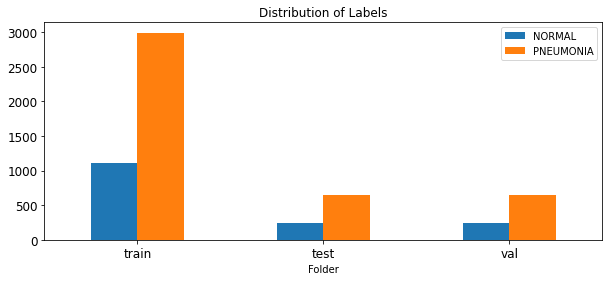

In [15]:
data.plot.bar(x='folder',rot=0,figsize=(10,4),title='Distribution of Labels',xlabel='Folder',fontsize='large')